# Clustering exercise

##### (Notebook By Itay Hazan)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In this exercise, we will:
1. implement $k$-means,
2. examine our implementation with different values of $k$,
3. compare our implementation with scikit-learn's implementation of GMM.

## Implementing $k$-means

Complete the following function:

In [83]:
def kmeans(X, k=2, precision=0.01):
    # step 1: initialize k random vectors
    means = np.random.random((k, X.shape[1]))
    
    # step 2: partition the data into k sets (a point is in the i'th set if it is closest to the i'th mean)
    sets = np.array([np.argmin([np.dot(x_i-c_i, x_i-c_i) for c_i in means]) for x_i in X])
    print(sets)
    # step 3: update the vectors in a loop until all of the updates to the means are smaller than precision
    previous_means = means
    means = np.array([X[sets == ki].mean(axis = 0) for ki in range(k)])
    while np.amax(previous_means - means) > precision:
        sets = np.array([np.argmin([np.dot(x_i-c_i, x_i-c_i) for c_i in means]) for x_i in X])
        print(sets)
        previous_means = means
        means = np.array([X[sets == ki].mean(axis = 0) for ki in range(k)])
    
    # step 4: return the means and the sets
    return means, sets

## Examine your implementation

First, complete the following code that generates a random set of points in $[0,1] \times [0,1]$:

In [11]:
def generateRandomPoints(num_points=15):
    return np.random.uniform(low=0, high=1, size=(num_points,2))

Run `generateRandomPoints` to get a set of random points and plot them using the `matplotlib`.

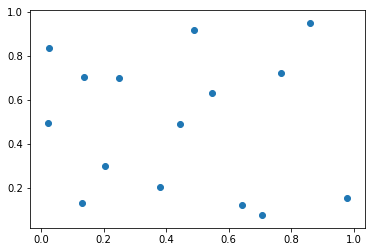

In [12]:
X = generateRandomPoints()
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
# TODO: Plot the points


Now, use your implementation of `kmeans` to plot the points clustered using $k$-means into 2 clusters. 

[1 1 1 1 0 1 1 1 1 0 1 0 0 1 0]
[1 1 1 1 0 1 1 1 1 0 1 0 0 1 0]


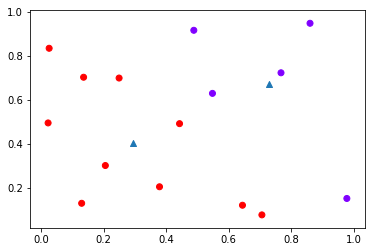

In [61]:
k = 2
means, sets = kmeans(X, k)

plt.figure()
plt.scatter(X[:,0],X[:,1], c=sets, cmap='rainbow')
plt.scatter(means[:, 0], means[:, 1], marker='^')
# TODO: plot the points in each set using a different color. 
# TODO: plot the mean of each set using the same color but with a different shape (e.g. a triangle)


Run the code above with different values of $k$, and evaluate your results.

## Comparison of $k$-means and GMM

The following code generates a common example of a "hard input" for $k$-means:

In [64]:
def generateHardInput(num_points=100):
    points = np.zeros((num_points, 2))
    n = int(num_points/2)
    points[:,0] = np.random.rand(num_points)*2 - 1
    points[:,1] = np.sqrt(1-points[:,0]*points[:,0]) * (-1)**np.random.randint(2, size=num_points)
    points[:,0] = np.where(points[:,1] > 0, points[:,0], points[:,0] + 1)
    points[:,1] = np.where(points[:,1] > 0, points[:,1]-0.4, points[:,1] + 0.4)
    points[:,1] += 0.05*np.random.randn(num_points)
    return points

Generate the hard input and plot it:

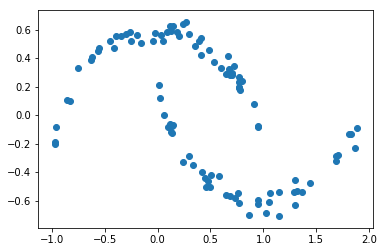

In [65]:
X = generateHardInput()
plt.figure()
plt.scatter(X[:, 0], X[:, 1])

Use $k$-means clustering (either your implementation or `scikit-learn`'s implementation) and output the result. Afterwards, use `scikit-learn`'s implementation of Expectation Minimization clustering using Gaussian Mixture Models, and output the result. Evaluate the differences.

[1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1]
[1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1]
[1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1]
[1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1]
[1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1

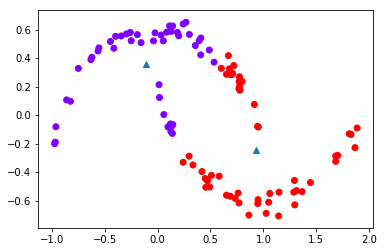

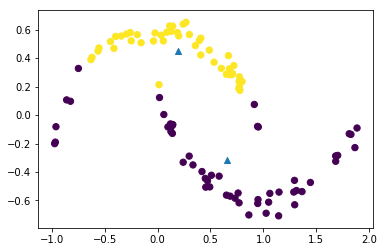

In [84]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
# step 1: clustering using k-means
#kmeans = KMeans(n_clusters=2)  
#kmeans.fit(X)
means, sets = kmeans(X, 2)
# step 2: plot 1 - k-means
plt.figure()
plt.scatter(X[:,0],X[:,1], c=sets, cmap='rainbow')
plt.scatter(means[:, 0], means[:, 1], marker='^')
# step 3: clustering using GMM
gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
#step 4: plot 2 - GMM
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='^')